In [1]:
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling as pdp
# from google.colab import files
# uploaded = files.upload()

Using TensorFlow backend.


/Users/tomori24/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
train = pd.read_csv('data/train.csv', header=0).sample(n=5000)
test = pd.read_csv('data/test.csv', header=0)
pdp.ProfileReport(train)

x_train = train.drop(['label'], axis=1).as_matrix()
y_train = train['label']
x_test = test.as_matrix()

num_classes = np.max(y_train) + 1
y_train = np_utils.to_categorical(y_train, 10)

x_train = x_train.astype('float')
x_test = x_test.astype('float')

x_train /= 255
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2)

print('x train shape: ', x_train.shape)
print('y train shape: ', y_train.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 30015 to 6435
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 30.0 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None


/Users/tomori24/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/Users/tomori24/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


x train shape:  (4000, 28, 28, 1)
y train shape:  (4000, 10)


In [3]:
def build_model(classes):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                       optimizer='sgd',
                       metrics=['accuracy'])
    return model

In [4]:
def plot_learning(train, valid, target):
    plt.plot(train)
    plt.plot(valid)
    plt.title('model' + target)
    plt.ylabel(target)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/10


  32/4000 [..............................] - ETA: 38s - loss: 2.3088 - acc: 0.1250

  96/4000 [..............................] - ETA: 15s - loss: 2.3036 - acc: 0.1042

 160/4000 [>.............................] - ETA: 10s - loss: 2.2995 - acc: 0.1062

 224/4000 [>.............................] - ETA: 8s - loss: 2.2930 - acc: 0.1071 

 320/4000 [=>............................] - ETA: 6s - loss: 2.2892 - acc: 0.1062

 416/4000 [==>...........................] - ETA: 5s - loss: 2.2835 - acc: 0.1178

 512/4000 [==>...........................] - ETA: 4s - loss: 2.2822 - acc: 0.1172

 608/4000 [===>..........................] - ETA: 4s - loss: 2.2768 - acc: 0.1234

 704/4000 [====>.........................] - ETA: 3s - loss: 2.2744 - acc: 0.1293

 800/4000 [=====>........................] - ETA: 3s - loss: 2.2709 - acc: 0.1325

 896/4000 [=====>........................] - ETA: 3s - loss: 2.2668 - acc: 0.1440

 992/4000 [======>.......................] - ETA: 3s - loss: 2.2609 - acc: 0.1623

1088/4000 [=======>......................] - ETA: 2s - loss: 2.2566 - acc: 0.1682

1184/4000 [=======>......................] - ETA: 2s - loss: 2.2517 - acc: 0.1816

1280/4000 [========>.....................] - ETA: 2s - loss: 2.2492 - acc: 0.1852

1376/4000 [=========>....................] - ETA: 2s - loss: 2.2445 - acc: 0.1955

1472/4000 [==========>...................] - ETA: 2s - loss: 2.2399 - acc: 0.2079

1536/4000 [==========>...................] - ETA: 2s - loss: 2.2355 - acc: 0.2188

1600/4000 [===========>..................] - ETA: 2s - loss: 2.2307 - acc: 0.2300

1664/4000 [===========>..................] - ETA: 2s - loss: 2.2258 - acc: 0.2422

1728/4000 [===========>..................] - ETA: 2s - loss: 2.2228 - acc: 0.2494

1824/4000 [============>.................] - ETA: 1s - loss: 2.2173 - acc: 0.2593

1920/4000 [=============>................] - ETA: 1s - loss: 2.2116 - acc: 0.2714

2016/4000 [==============>...............] - ETA: 1s - loss: 2.2045 - acc: 0.2852

2112/4000 [==============>...............] - ETA: 1s - loss: 2.1976 - acc: 0.2988

2208/4000 [===============>..............] - ETA: 1s - loss: 2.1906 - acc: 0.3093

2272/4000 [================>.............] - ETA: 1s - loss: 2.1857 - acc: 0.3165

2336/4000 [================>.............] - ETA: 1s - loss: 2.1807 - acc: 0.3241

2400/4000 [=================>............] - ETA: 1s - loss: 2.1773 - acc: 0.3267

2496/4000 [=================>............] - ETA: 1s - loss: 2.1691 - acc: 0.3413

2592/4000 [==================>...........] - ETA: 1s - loss: 2.1616 - acc: 0.3507

2688/4000 [===================>..........] - ETA: 1s - loss: 2.1528 - acc: 0.3627

2784/4000 [===================>..........] - ETA: 1s - loss: 2.1449 - acc: 0.3718

2880/4000 [====================>.........] - ETA: 0s - loss: 2.1372 - acc: 0.3806

2976/4000 [=====================>........] - ETA: 0s - loss: 2.1287 - acc: 0.3891

3072/4000 [======================>.......] - ETA: 0s - loss: 2.1173 - acc: 0.3991

3168/4000 [======================>.......] - ETA: 0s - loss: 2.1066 - acc: 0.4056

3264/4000 [=======================>......] - ETA: 0s - loss: 2.0961 - acc: 0.4124

3360/4000 [========================>.....] - ETA: 0s - loss: 2.0856 - acc: 0.4188

3456/4000 [========================>.....] - ETA: 0s - loss: 2.0756 - acc: 0.4256

3552/4000 [=========================>....] - ETA: 0s - loss: 2.0652 - acc: 0.4316

3648/4000 [==========================>...] - ETA: 0s - loss: 2.0519 - acc: 0.4394

3712/4000 [==========================>...] - ETA: 0s - loss: 2.0443 - acc: 0.4442

3808/4000 [===========================>..] - ETA: 0s - loss: 2.0335 - acc: 0.4496

3904/4000 [============================>.] - ETA: 0s - loss: 2.0207 - acc: 0.4562

4000/4000 [==============================] - 3s 829us/step - loss: 2.0050 - acc: 0.4637 - val_loss: 1.4428 - val_acc: 0.7320


Epoch 2/10
  32/4000 [..............................] - ETA: 3s - loss: 1.3972 - acc: 0.8125

  96/4000 [..............................] - ETA: 3s - loss: 1.4057 - acc: 0.8438

 160/4000 [>.............................] - ETA: 4s - loss: 1.3942 - acc: 0.8125

 256/4000 [>.............................] - ETA: 3s - loss: 1.3680 - acc: 0.7773

 352/4000 [=>............................] - ETA: 3s - loss: 1.3606 - acc: 0.7614

 448/4000 [==>...........................] - ETA: 2s - loss: 1.3361 - acc: 0.7656

 544/4000 [===>..........................] - ETA: 2s - loss: 1.3133 - acc: 0.7629

 640/4000 [===>..........................] - ETA: 2s - loss: 1.3086 - acc: 0.7641

 736/4000 [====>.........................] - ETA: 2s - loss: 1.2917 - acc: 0.7690

 832/4000 [=====>........................] - ETA: 2s - loss: 1.2790 - acc: 0.7668

 928/4000 [=====>........................] - ETA: 2s - loss: 1.2690 - acc: 0.7619

1024/4000 [======>.......................] - ETA: 2s - loss: 1.2572 - acc: 0.7646

1120/4000 [=======>......................] - ETA: 2s - loss: 1.2408 - acc: 0.7643

1216/4000 [========>.....................] - ETA: 1s - loss: 1.2313 - acc: 0.7615

1312/4000 [========>.....................] - ETA: 1s - loss: 1.2113 - acc: 0.7675

1408/4000 [=========>....................] - ETA: 1s - loss: 1.1966 - acc: 0.7656

1504/4000 [==========>...................] - ETA: 1s - loss: 1.1801 - acc: 0.7646

1568/4000 [==========>...................] - ETA: 1s - loss: 1.1691 - acc: 0.7647

1632/4000 [===========>..................] - ETA: 1s - loss: 1.1572 - acc: 0.7665

1696/4000 [===========>..................] - ETA: 1s - loss: 1.1510 - acc: 0.7653

1792/4000 [============>.................] - ETA: 1s - loss: 1.1421 - acc: 0.7651

1888/4000 [=============>................] - ETA: 1s - loss: 1.1315 - acc: 0.7659

1984/4000 [=============>................] - ETA: 1s - loss: 1.1200 - acc: 0.7661

2080/4000 [==============>...............] - ETA: 1s - loss: 1.1034 - acc: 0.7707

2176/4000 [===============>..............] - ETA: 1s - loss: 1.0891 - acc: 0.7739

2272/4000 [================>.............] - ETA: 1s - loss: 1.0846 - acc: 0.7716

2368/4000 [================>.............] - ETA: 1s - loss: 1.0757 - acc: 0.7728

2464/4000 [=================>............] - ETA: 1s - loss: 1.0642 - acc: 0.7735

2560/4000 [==================>...........] - ETA: 1s - loss: 1.0496 - acc: 0.7750

2656/4000 [==================>...........] - ETA: 0s - loss: 1.0421 - acc: 0.7748

2752/4000 [===================>..........] - ETA: 0s - loss: 1.0303 - acc: 0.7765

2848/4000 [====================>.........] - ETA: 0s - loss: 1.0193 - acc: 0.7777

2944/4000 [=====================>........] - ETA: 0s - loss: 1.0134 - acc: 0.7765

3040/4000 [=====================>........] - ETA: 0s - loss: 1.0022 - acc: 0.7776

3136/4000 [======================>.......] - ETA: 0s - loss: 0.9953 - acc: 0.7784

3200/4000 [=======================>......] - ETA: 0s - loss: 0.9887 - acc: 0.7803

3296/4000 [=======================>......] - ETA: 0s - loss: 0.9810 - acc: 0.7825

3392/4000 [========================>.....] - ETA: 0s - loss: 0.9726 - acc: 0.7836

3488/4000 [=========================>....] - ETA: 0s - loss: 0.9676 - acc: 0.7833

3584/4000 [=========================>....] - ETA: 0s - loss: 0.9612 - acc: 0.7843

3680/4000 [==========================>...] - ETA: 0s - loss: 0.9509 - acc: 0.7861

3776/4000 [===========================>..] - ETA: 0s - loss: 0.9480 - acc: 0.7858

3872/4000 [============================>.] - ETA: 0s - loss: 0.9391 - acc: 0.7880

3968/4000 [============================>.] - ETA: 0s - loss: 0.9310 - acc: 0.7893

4000/4000 [==============================] - 3s 733us/step - loss: 0.9280 - acc: 0.7900 - val_loss: 0.6390 - val_acc: 0.8180


Epoch 3/10
  32/4000 [..............................] - ETA: 3s - loss: 0.5402 - acc: 0.9375

  96/4000 [..............................] - ETA: 3s - loss: 0.6262 - acc: 0.8333

 160/4000 [>.............................] - ETA: 3s - loss: 0.6145 - acc: 0.8375

 256/4000 [>.............................] - ETA: 3s - loss: 0.5530 - acc: 0.8711

 352/4000 [=>............................] - ETA: 2s - loss: 0.5488 - acc: 0.8608

 448/4000 [==>...........................] - ETA: 2s - loss: 0.5807 - acc: 0.8527

 544/4000 [===>..........................] - ETA: 2s - loss: 0.6304 - acc: 0.8272

 640/4000 [===>..........................] - ETA: 2s - loss: 0.6290 - acc: 0.8281

 736/4000 [====>.........................] - ETA: 2s - loss: 0.6110 - acc: 0.8342

 832/4000 [=====>........................] - ETA: 2s - loss: 0.6146 - acc: 0.8317

 928/4000 [=====>........................] - ETA: 2s - loss: 0.6311 - acc: 0.8265

1024/4000 [======>.......................] - ETA: 2s - loss: 0.6239 - acc: 0.8330

1120/4000 [=======>......................] - ETA: 2s - loss: 0.6096 - acc: 0.8375

1216/4000 [========>.....................] - ETA: 1s - loss: 0.6081 - acc: 0.8372

1312/4000 [========>.....................] - ETA: 1s - loss: 0.6094 - acc: 0.8377

1408/4000 [=========>....................] - ETA: 1s - loss: 0.6086 - acc: 0.8338

1504/4000 [==========>...................] - ETA: 1s - loss: 0.6023 - acc: 0.8351



1568/4000 [==========>...................] - ETA: 1s - loss: 0.5987 - acc: 0.8367

1632/4000 [===========>..................] - ETA: 1s - loss: 0.5977 - acc: 0.8364



1696/4000 [===========>..................] - ETA: 1s - loss: 0.5994 - acc: 0.8337

1760/4000 [============>.................] - ETA: 1s - loss: 0.5905 - acc: 0.8364

1856/4000 [============>.................] - ETA: 1s - loss: 0.5865 - acc: 0.8384

1952/4000 [=============>................] - ETA: 1s - loss: 0.5808 - acc: 0.8407

2048/4000 [==============>...............] - ETA: 1s - loss: 0.5836 - acc: 0.8389

2144/4000 [===============>..............] - ETA: 1s - loss: 0.5916 - acc: 0.8368

2240/4000 [===============>..............] - ETA: 1s - loss: 0.5874 - acc: 0.8375

2336/4000 [================>.............] - ETA: 1s - loss: 0.5849 - acc: 0.8369

2432/4000 [=================>............] - ETA: 1s - loss: 0.5842 - acc: 0.8363

2528/4000 [=================>............] - ETA: 1s - loss: 0.5785 - acc: 0.8394

2624/4000 [==================>...........] - ETA: 0s - loss: 0.5741 - acc: 0.8411

2720/4000 [===================>..........] - ETA: 0s - loss: 0.5676 - acc: 0.8430

2816/4000 [====================>.........] - ETA: 0s - loss: 0.5649 - acc: 0.8441

2912/4000 [====================>.........] - ETA: 0s - loss: 0.5630 - acc: 0.8455

3008/4000 [=====================>........] - ETA: 0s - loss: 0.5614 - acc: 0.8451

3104/4000 [======================>.......] - ETA: 0s - loss: 0.5590 - acc: 0.8457

3200/4000 [=======================>......] - ETA: 0s - loss: 0.5569 - acc: 0.8478

3296/4000 [=======================>......] - ETA: 0s - loss: 0.5511 - acc: 0.8504

3392/4000 [========================>.....] - ETA: 0s - loss: 0.5473 - acc: 0.8508

3488/4000 [=========================>....] - ETA: 0s - loss: 0.5446 - acc: 0.8521

3584/4000 [=========================>....] - ETA: 0s - loss: 0.5432 - acc: 0.8516

3680/4000 [==========================>...] - ETA: 0s - loss: 0.5422 - acc: 0.8514

3776/4000 [===========================>..] - ETA: 0s - loss: 0.5377 - acc: 0.8533

3872/4000 [============================>.] - ETA: 0s - loss: 0.5420 - acc: 0.8512

3968/4000 [============================>.] - ETA: 0s - loss: 0.5411 - acc: 0.8521

4000/4000 [==============================] - 3s 745us/step - loss: 0.5389 - acc: 0.8528 - val_loss: 0.5002 - val_acc: 0.8490


Epoch 4/10
  32/4000 [..............................] - ETA: 3s - loss: 0.4012 - acc: 0.9688

  96/4000 [..............................] - ETA: 3s - loss: 0.4554 - acc: 0.8958

 160/4000 [>.............................] - ETA: 3s - loss: 0.4591 - acc: 0.8938

 256/4000 [>.............................] - ETA: 3s - loss: 0.4201 - acc: 0.9023

 352/4000 [=>............................] - ETA: 2s - loss: 0.4383 - acc: 0.8920

 416/4000 [==>...........................] - ETA: 2s - loss: 0.4255 - acc: 0.8942

 512/4000 [==>...........................] - ETA: 2s - loss: 0.4414 - acc: 0.8867

 608/4000 [===>..........................] - ETA: 2s - loss: 0.4606 - acc: 0.8750

 704/4000 [====>.........................] - ETA: 2s - loss: 0.4503 - acc: 0.8807

 800/4000 [=====>........................] - ETA: 2s - loss: 0.4394 - acc: 0.8838

 896/4000 [=====>........................] - ETA: 2s - loss: 0.4431 - acc: 0.8806

 992/4000 [======>.......................] - ETA: 2s - loss: 0.4507 - acc: 0.8800

1056/4000 [======>.......................] - ETA: 2s - loss: 0.4539 - acc: 0.8807

1152/4000 [=======>......................] - ETA: 2s - loss: 0.4495 - acc: 0.8819

1248/4000 [========>.....................] - ETA: 2s - loss: 0.4557 - acc: 0.8750

1344/4000 [=========>....................] - ETA: 1s - loss: 0.4571 - acc: 0.8735

1440/4000 [=========>....................] - ETA: 1s - loss: 0.4652 - acc: 0.8701

1504/4000 [==========>...................] - ETA: 1s - loss: 0.4641 - acc: 0.8717

1568/4000 [==========>...................] - ETA: 1s - loss: 0.4735 - acc: 0.8686

1632/4000 [===========>..................] - ETA: 1s - loss: 0.4717 - acc: 0.8683

1728/4000 [===========>..................] - ETA: 1s - loss: 0.4682 - acc: 0.8709

1824/4000 [============>.................] - ETA: 1s - loss: 0.4671 - acc: 0.8706

1920/4000 [=============>................] - ETA: 1s - loss: 0.4601 - acc: 0.8729

2016/4000 [==============>...............] - ETA: 1s - loss: 0.4630 - acc: 0.8720

2112/4000 [==============>...............] - ETA: 1s - loss: 0.4651 - acc: 0.8731

2208/4000 [===============>..............] - ETA: 1s - loss: 0.4641 - acc: 0.8723

2304/4000 [================>.............]

 - ETA: 1s - loss: 0.4613 - acc: 0.8737

2368/4000 [================>.............] - ETA: 1s - loss: 0.4611 - acc: 0.8725

2464/4000 [=================>............] - ETA: 1s - loss: 0.4592 - acc: 0.8726

2560/4000 [==================>...........] - ETA: 1s - loss: 0.4573 - acc: 0.8727

2656/4000 [==================>...........] - ETA: 0s - loss: 0.4552 - acc: 0.8724

2752/4000 [===================>..........] - ETA: 0s - loss: 0.4547 - acc: 0.8725

2848/4000 [====================>.........] - ETA: 0s - loss: 0.4513 - acc: 0.8729

2944/4000 [=====================>........] - ETA: 0s - loss: 0.4536 - acc: 0.8723

3040/4000 [=====================>........] - ETA: 0s - loss: 0.4529 - acc: 0.8727

3136/4000 [======================>.......] - ETA: 0s - loss: 0.4517 - acc: 0.8737

3200/4000 [=======================>......] - ETA: 0s - loss: 0.4485 - acc: 0.8744

3264/4000 [=======================>......] - ETA: 0s - loss: 0.4464 - acc: 0.8753

3328/4000 [=======================>......] - ETA: 0s - loss: 0.4473 - acc: 0.8756

3424/4000 [========================>.....] - ETA: 0s - loss: 0.4450 - acc: 0.8759

3488/4000 [=========================>....] - ETA: 0s - loss: 0.4428 - acc: 0.8761

3552/4000 [=========================>....] - ETA: 0s - loss: 0.4433 - acc: 0.8756

3648/4000 [==========================>...] - ETA: 0s - loss: 0.4435 - acc: 0.8750

3744/4000 [===========================>..] - ETA: 0s - loss: 0.4410 - acc: 0.8753

3808/4000 [===========================>..] - ETA: 0s - loss: 0.4418 - acc: 0.8753

3872/4000 [============================>.] - ETA: 0s - loss: 0.4420 - acc: 0.8755

3968/4000 [============================>.] - ETA: 0s - loss: 0.4468 - acc: 0.8740

4000/4000 [==============================] - 3s 790us/step - loss: 0.4466 - acc: 0.8740 - val_loss: 0.4344 - val_acc: 0.8800


Epoch 5/10
  32/4000 [..............................] - ETA: 3s - loss: 0.4420 - acc: 0.8750

  96/4000 [..............................] - ETA: 3s - loss: 0.4152 - acc: 0.8646

 160/4000 [>.............................] - ETA: 3s - loss: 0.3348 - acc: 0.9000

 224/4000 [>.............................] - ETA: 3s - loss: 0.3513 - acc: 0.8929

 288/4000 [=>............................] - ETA: 3s - loss: 0.3829 - acc: 0.8785

 352/4000 [=>............................] - ETA: 3s - loss: 0.3852 - acc: 0.8750

 416/4000 [==>...........................] - ETA: 3s - loss: 0.3984 - acc: 0.8774

 480/4000 [==>...........................] - ETA: 3s - loss: 0.3867 - acc: 0.8792

 544/4000 [===>..........................] - ETA: 2s - loss: 0.3994 - acc: 0.8732

 608/4000 [===>..........................] - ETA: 2s - loss: 0.4221 - acc: 0.8684

 672/4000 [====>.........................] - ETA: 2s - loss: 0.4362 - acc: 0.8720

 768/4000 [====>.........................] - ETA: 2s - loss: 0.4298 - acc: 0.8737

 864/4000 [=====>........................] - ETA: 2s - loss: 0.4112 - acc: 0.8796

 928/4000 [=====>........................] - ETA: 2s - loss: 0.4198 - acc: 0.8750

 992/4000 [======>.......................] - ETA: 2s - loss: 0.4156 - acc: 0.8760

1056/4000 [======>.......................] - ETA: 2s - loss: 0.4134 - acc: 0.8778

1120/4000 [=======>......................] - ETA: 2s - loss: 0.4050 - acc: 0.8812

1216/4000 [========>.....................] - ETA: 2s - loss: 0.4127 - acc: 0.8799

1280/4000 [========>.....................] - ETA: 2s - loss: 0.4156 - acc: 0.8773

1344/4000 [=========>....................] - ETA: 2s - loss: 0.4114 - acc: 0.8787

1376/4000 [=========>....................] - ETA: 2s - loss: 0.4133 - acc: 0.8794

1440/4000 [=========>....................] - ETA: 2s - loss: 0.4122 - acc: 0.8785

1504/4000 [==========>...................] - ETA: 2s - loss: 0.4130 - acc: 0.8790

1568/4000 [==========>...................] - ETA: 2s - loss: 0.4127 - acc: 0.8788

1632/4000 [===========>..................] - ETA: 2s - loss: 0.4073 - acc: 0.8811

1696/4000 [===========>..................] - ETA: 1s - loss: 0.4095 - acc: 0.8791

1760/4000 [============>.................] - ETA: 1s - loss: 0.4023 - acc: 0.8818

1824/4000 [============>.................] - ETA: 1s - loss: 0.4020 - acc: 0.8827

1888/4000 [=============>................] - ETA: 1s - loss: 0.3982 - acc: 0.8829

1952/4000 [=============>................] - ETA: 1s - loss: 0.3983 - acc: 0.8822

2016/4000 [==============>...............] - ETA: 1s - loss: 0.4055 - acc: 0.8814

2080/4000 [==============>...............] - ETA: 1s - loss: 0.4078 - acc: 0.8817

2144/4000 [===============>..............] - ETA: 1s - loss: 0.4079 - acc: 0.8811

2208/4000 [===============>..............] - ETA: 1s - loss: 0.4056 - acc: 0.8813

2272/4000 [================>.............] - ETA: 1s - loss: 0.4103 - acc: 0.8790

2336/4000 [================>.............] - ETA: 1s - loss: 0.4085 - acc: 0.8793

2400/4000 [=================>............] - ETA: 1s - loss: 0.4080 - acc: 0.8788

2464/4000 [=================>............] - ETA: 1s - loss: 0.4121 - acc: 0.8774

2560/4000 [==================>...........] - ETA: 1s - loss: 0.4141 - acc: 0.8785

2624/4000 [==================>...........] - ETA: 1s - loss: 0.4133 - acc: 0.8792

2688/4000 [===================>..........] - ETA: 1s - loss: 0.4135 - acc: 0.8795

2752/4000 [===================>..........] - ETA: 1s - loss: 0.4112 - acc: 0.8805

2816/4000 [====================>.........] - ETA: 1s - loss: 0.4090 - acc: 0.8800

2880/4000 [====================>.........] - ETA: 0s - loss: 0.4090 - acc: 0.8802

2944/4000 [=====================>........] - ETA: 0s - loss: 0.4111 - acc: 0.8798

3040/4000 [=====================>........] - ETA: 0s - loss: 0.4073 - acc: 0.8812

3136/4000 [======================>.......] - ETA: 0s - loss: 0.4057 - acc: 0.8817

3200/4000 [=======================>......] - ETA: 0s - loss: 0.4055 - acc: 0.8809

3264/4000 [=======================>......] - ETA: 0s - loss: 0.4050 - acc: 0.8814

3328/4000 [=======================>......] - ETA: 0s - loss: 0.4049 - acc: 0.8819

3392/4000 [========================>.....] - ETA: 0s - loss: 0.4016 - acc: 0.8830



3456/4000 [========================>.....] - ETA: 0s - loss: 0.3994 - acc: 0.8840

3520/4000 [=========================>....] - ETA: 0s - loss: 0.3996 - acc: 0.8838

3584/4000 [=========================>....] - ETA: 0s - loss: 0.4007 - acc: 0.8834

3648/4000 [==========================>...] - ETA: 0s - loss: 0.4005 - acc: 0.8832

3712/4000 [==========================>...] - ETA: 0s - loss: 0.3978 - acc: 0.8842

3776/4000 [===========================>..] - ETA: 0s - loss: 0.3966 - acc: 0.8843

3840/4000 [===========================>..] - ETA: 0s - loss: 0.4002 - acc: 0.8836

3904/4000 [============================>.] - ETA: 0s - loss: 0.4011 - acc: 0.8837

3968/4000 [============================>.] - ETA: 0s - loss: 0.4015 - acc: 0.8838

4000/4000 [==============================] - 4s 908us/step - loss: 0.4023 - acc: 0.8832 - val_loss: 0.3904 - val_acc: 0.8800


Epoch 6/10
  32/4000 [..............................] - ETA: 3s - loss: 0.3211 - acc: 0.8438

  96/4000 [..............................] - ETA: 3s - loss: 0.3104 - acc: 0.8854

 160/4000 [>.............................] - ETA: 3s - loss: 0.3660 - acc: 0.9000

 224/4000 [>.............................] - ETA: 3s - loss: 0.3828 - acc: 0.8884

 288/4000 [=>............................] - ETA: 3s - loss: 0.3401 - acc: 0.9028



 352/4000 [=>............................] - ETA: 3s - loss: 0.3629 - acc: 0.8949

 416/4000 [==>...........................] - ETA: 3s - loss: 0.3638 - acc: 0.8966

 480/4000 [==>...........................] - ETA: 3s - loss: 0.3866 - acc: 0.8938

 544/4000 [===>..........................] - ETA: 2s - loss: 0.3923 - acc: 0.8934

 608/4000 [===>..........................] - ETA: 2s - loss: 0.3969 - acc: 0.8882

 672/4000 [====>.........................] - ETA: 2s - loss: 0.4120 - acc: 0.8824

 736/4000 [====>.........................] - ETA: 2s - loss: 0.4019 - acc: 0.8872

 800/4000 [=====>........................] - ETA: 2s - loss: 0.3934 - acc: 0.8900

 864/4000 [=====>........................] - ETA: 2s - loss: 0.3805 - acc: 0.8924

 928/4000 [=====>........................] - ETA: 2s - loss: 0.3850 - acc: 0.8890

 992/4000 [======>.......................] - ETA: 2s - loss: 0.3800 - acc: 0.8911

1056/4000 [======>.......................] - ETA: 2s - loss: 0.3774 - acc: 0.8930

1120/4000 [=======>......................] - ETA: 2s - loss: 0.3926 - acc: 0.8866

1184/4000 [=======>......................] - ETA: 2s - loss: 0.3929 - acc: 0.8860

1248/4000 [========>.....................] - ETA: 2s - loss: 0.3939 - acc: 0.8878

1312/4000 [========>.....................] - ETA: 2s - loss: 0.3846 - acc: 0.8910

1376/4000 [=========>....................] - ETA: 2s - loss: 0.3757 - acc: 0.8924

1440/4000 [=========>....................] - ETA: 2s - loss: 0.3754 - acc: 0.8903

1504/4000 [==========>...................] - ETA: 2s - loss: 0.3798 - acc: 0.8890

1568/4000 [==========>...................] - ETA: 2s - loss: 0.3793 - acc: 0.8903

1632/4000 [===========>..................] - ETA: 2s - loss: 0.3729 - acc: 0.8928

1696/4000 [===========>..................] - ETA: 1s - loss: 0.3679 - acc: 0.8939

1760/4000 [============>.................] - ETA: 1s - loss: 0.3618 - acc: 0.8949

1824/4000 [============>.................] - ETA: 1s - loss: 0.3636 - acc: 0.8936

1888/4000 [=============>................] - ETA: 1s - loss: 0.3653 - acc: 0.8946

1952/4000 [=============>................] - ETA: 1s - loss: 0.3645 - acc: 0.8955

2016/4000 [==============>...............] - ETA: 1s - loss: 0.3594 - acc: 0.8973

2080/4000 [==============>...............] - ETA: 1s - loss: 0.3604 - acc: 0.8962

2144/4000 [===============>..............] - ETA: 1s - loss: 0.3640 - acc: 0.8955

2208/4000 [===============>..............] - ETA: 1s - loss: 0.3599 - acc: 0.8972

2272/4000 [================>.............] - ETA: 1s - loss: 0.3577 - acc: 0.8983

2336/4000 [================>.............] - ETA: 1s - loss: 0.3600 - acc: 0.8977

2400/4000 [=================>............] - ETA: 1s - loss: 0.3665 - acc: 0.8958

2464/4000 [=================>............] - ETA: 1s - loss: 0.3665 - acc: 0.8957

2528/4000 [=================>............] - ETA: 1s - loss: 0.3627 - acc: 0.8964

2592/4000 [==================>...........] - ETA: 1s - loss: 0.3663 - acc: 0.8954

2656/4000 [==================>...........] - ETA: 1s - loss: 0.3648 - acc: 0.8961

2720/4000 [===================>..........] - ETA: 1s - loss: 0.3671 - acc: 0.8963

2784/4000 [===================>..........] - ETA: 1s - loss: 0.3702 - acc: 0.8940

2848/4000 [====================>.........] - ETA: 0s - loss: 0.3675 - acc: 0.8950

2912/4000 [====================>.........] - ETA: 0s - loss: 0.3689 - acc: 0.8946

2976/4000 [=====================>........] - ETA: 0s - loss: 0.3672 - acc: 0.8948

3040/4000 [=====================>........] - ETA: 0s - loss: 0.3665 - acc: 0.8947

3104/4000 [======================>.......] - ETA: 0s - loss: 0.3651 - acc: 0.8956

3168/4000 [======================>.......] - ETA: 0s - loss: 0.3639 - acc: 0.8955

3232/4000 [=======================>......] - ETA: 0s - loss: 0.3622 - acc: 0.8954

3296/4000 [=======================>......] - ETA: 0s - loss: 0.3659 - acc: 0.8938

3360/4000 [========================>.....] - ETA: 0s - loss: 0.3633 - acc: 0.8943

3424/4000 [========================>.....] - ETA: 0s - loss: 0.3619 - acc: 0.8943

3488/4000 [=========================>....] - ETA: 0s - loss: 0.3640 - acc: 0.8922

3552/4000 [=========================>....] - ETA: 0s - loss: 0.3632 - acc: 0.8927

3616/4000 [==========================>...] - ETA: 0s - loss: 0.3608 - acc: 0.8938

3680/4000 [==========================>...] - ETA: 0s - loss: 0.3581 - acc: 0.8954

3744/4000 [===========================>..] - ETA: 0s - loss: 0.3603 - acc: 0.8945

3808/4000 [===========================>..] - ETA: 0s - loss: 0.3616 - acc: 0.8939

3872/4000 [============================>.] - ETA: 0s - loss: 0.3606 - acc: 0.8946

3936/4000 [============================>.] - ETA: 0s - loss: 0.3621 - acc: 0.8946

4000/4000 [==============================] - 4s 888us/step - loss: 0.3622 - acc: 0.8948 - val_loss: 0.3917 - val_acc: 0.8820


Epoch 7/10
  32/4000 [..............................] - ETA: 3s - loss: 0.4678 - acc: 0.8750

  96/4000 [..............................] - ETA: 3s - loss: 0.4610 - acc: 0.8750

 192/4000 [>.............................] - ETA: 3s - loss: 0.3477 - acc: 0.9062

 256/4000 [>.............................] - ETA: 3s - loss: 0.3551 - acc: 0.9023

 320/4000 [=>............................] - ETA: 3s - loss: 0.3651 - acc: 0.9000

 384/4000 [=>............................] - ETA: 2s - loss: 0.3454 - acc: 0.9010

 448/4000 [==>...........................] - ETA: 2s - loss: 0.3610 - acc: 0.8951

 544/4000 [===>..........................] - ETA: 2s - loss: 0.3522 - acc: 0.8952

 608/4000 [===>..........................] - ETA: 2s - loss: 0.3498 - acc: 0.8964

 672/4000 [====>.........................] - ETA: 2s - loss: 0.3513 - acc: 0.8958

 736/4000 [====>.........................] - ETA: 2s - loss: 0.3407 - acc: 0.8967

 800/4000 [=====>........................] - ETA: 2s - loss: 0.3480 - acc: 0.8975

 864/4000 [=====>........................] - ETA: 2s - loss: 0.3458 - acc: 0.8981

 928/4000 [=====>........................] - ETA: 2s - loss: 0.3513 - acc: 0.8976

1024/4000 [======>.......................] - ETA: 2s - loss: 0.3434 - acc: 0.9033

1120/4000 [=======>......................] - ETA: 2s - loss: 0.3678 - acc: 0.8991

1184/4000 [=======>......................] - ETA: 2s - loss: 0.3658 - acc: 0.8995

1248/4000 [========>.....................] - ETA: 2s - loss: 0.3627 - acc: 0.9006

1312/4000 [========>.....................] - ETA: 2s - loss: 0.3657 - acc: 0.8986

1376/4000 [=========>....................] - ETA: 2s - loss: 0.3699 - acc: 0.8961

1440/4000 [=========>....................] - ETA: 2s - loss: 0.3690 - acc: 0.8958

1504/4000 [==========>...................] - ETA: 2s - loss: 0.3625 - acc: 0.8983

1568/4000 [==========>...................] - ETA: 1s - loss: 0.3575 - acc: 0.8999

1632/4000 [===========>..................] - ETA: 1s - loss: 0.3586 - acc: 0.9001

1696/4000 [===========>..................] - ETA: 1s - loss: 0.3600 - acc: 0.8992



1760/4000 [============>.................] - ETA: 1s - loss: 0.3598 - acc: 0.8989

1824/4000 [============>.................] - ETA: 1s - loss: 0.3631 - acc: 0.8991

1888/4000 [=============>................] - ETA: 1s - loss: 0.3617 - acc: 0.8978

1952/4000 [=============>................] - ETA: 1s - loss: 0.3623 - acc: 0.8986

2016/4000 [==============>...............] - ETA: 1s - loss: 0.3588 - acc: 0.8998

2080/4000 [==============>...............] - ETA: 1s - loss: 0.3658 - acc: 0.8981

2176/4000 [===============>..............] - ETA: 1s - loss: 0.3603 - acc: 0.8989

2272/4000 [================>.............] - ETA: 1s - loss: 0.3557 - acc: 0.8996

2336/4000 [================>.............] - ETA: 1s - loss: 0.3593 - acc: 0.8973

2400/4000 [=================>............] - ETA: 1s - loss: 0.3591 - acc: 0.8979

2464/4000 [=================>............] - ETA: 1s - loss: 0.3589 - acc: 0.8965

2528/4000 [=================>............] - ETA: 1s - loss: 0.3584 - acc: 0.8964

2592/4000 [==================>...........] - ETA: 1s - loss: 0.3569 - acc: 0.8958

2656/4000 [==================>...........] - ETA: 1s - loss: 0.3537 - acc: 0.8972

2720/4000 [===================>..........] - ETA: 1s - loss: 0.3501 - acc: 0.8978

2784/4000 [===================>..........] - ETA: 0s - loss: 0.3499 - acc: 0.8980

2880/4000 [====================>.........] - ETA: 0s - loss: 0.3528 - acc: 0.8976

2976/4000 [=====================>........] - ETA: 0s - loss: 0.3485 - acc: 0.8989

3040/4000 [=====================>........] - ETA: 0s - loss: 0.3500 - acc: 0.8984

3104/4000 [======================>.......] - ETA: 0s - loss: 0.3482 - acc: 0.8988

3168/4000 [======================>.......] - ETA: 0s - loss: 0.3461 - acc: 0.8996

3232/4000 [=======================>......] - ETA: 0s - loss: 0.3442 - acc: 0.8998

3296/4000 [=======================>......] - ETA: 0s - loss: 0.3432 - acc: 0.9002



3360/4000 [========================>.....] - ETA: 0s - loss: 0.3452 - acc: 0.9000

3424/4000 [========================>.....] - ETA: 0s - loss: 0.3433 - acc: 0.9007

3488/4000 [=========================>....] - ETA: 0s - loss: 0.3416 - acc: 0.9017

3552/4000 [=========================>....] - ETA: 0s - loss: 0.3414 - acc: 0.9017

3616/4000 [==========================>...] - ETA: 0s - loss: 0.3390 - acc: 0.9027

3680/4000 [==========================>...] - ETA: 0s - loss: 0.3368 - acc: 0.9033

3744/4000 [===========================>..] - ETA: 0s - loss: 0.3395 - acc: 0.9028

3808/4000 [===========================>..] - ETA: 0s - loss: 0.3414 - acc: 0.9023

3872/4000 [============================>.] - ETA: 0s - loss: 0.3408 - acc: 0.9026

3936/4000 [============================>.] - ETA: 0s - loss: 0.3384 - acc: 0.9032

4000/4000 [==============================] - 3s 855us/step - loss: 0.3366 - acc: 0.9032 - val_loss: 0.3461 - val_acc: 0.8890


Epoch 8/10
  32/4000 [..............................] - ETA: 3s - loss: 0.1667 - acc: 0.9688

  96/4000 [..............................] - ETA: 3s - loss: 0.2185 - acc: 0.9271

 160/4000 [>.............................] - ETA: 3s - loss: 0.2490 - acc: 0.9062

 224/4000 [>.............................] - ETA: 3s - loss: 0.2792 - acc: 0.9107

 288/4000 [=>............................] - ETA: 3s - loss: 0.2619 - acc: 0.9201

 352/4000 [=>............................] - ETA: 3s - loss: 0.2695 - acc: 0.9205

 416/4000 [==>...........................] - ETA: 2s - loss: 0.2878 - acc: 0.9159

 480/4000 [==>...........................] - ETA: 2s - loss: 0.2758 - acc: 0.9167

 544/4000 [===>..........................] - ETA: 2s - loss: 0.2738 - acc: 0.9173

 608/4000 [===>..........................] - ETA: 2s - loss: 0.2701 - acc: 0.9161

 672/4000 [====>.........................] - ETA: 2s - loss: 0.2634 - acc: 0.9182

 736/4000 [====>.........................] - ETA: 2s - loss: 0.2617 - acc: 0.9185

 800/4000 [=====>........................] - ETA: 2s - loss: 0.2812 - acc: 0.9100

 864/4000 [=====>........................] - ETA: 2s - loss: 0.2875 - acc: 0.9062

 928/4000 [=====>........................] - ETA: 2s - loss: 0.2978 - acc: 0.9062

 992/4000 [======>.......................] - ETA: 2s - loss: 0.2924 - acc: 0.9073

1056/4000 [======>.......................] - ETA: 2s - loss: 0.2945 - acc: 0.9044

1120/4000 [=======>......................] - ETA: 2s - loss: 0.2997 - acc: 0.9027

1184/4000 [=======>......................] - ETA: 2s - loss: 0.2973 - acc: 0.9029

1280/4000 [========>.....................] - ETA: 2s - loss: 0.2893 - acc: 0.9070

1344/4000 [=========>....................] - ETA: 2s - loss: 0.2903 - acc: 0.9077

1408/4000 [=========>....................] - ETA: 2s - loss: 0.2924 - acc: 0.9091

1472/4000 [==========>...................] - ETA: 2s - loss: 0.2951 - acc: 0.9090

1536/4000 [==========>...................] - ETA: 2s - loss: 0.2928 - acc: 0.9102

1600/4000 [===========>..................] - ETA: 1s - loss: 0.2956 - acc: 0.9081

1664/4000 [===========>..................] - ETA: 1s - loss: 0.2948 - acc: 0.9081



1728/4000 [===========>..................] - ETA: 1s - loss: 0.2954 - acc: 0.9086

1792/4000 [============>.................] - ETA: 1s - loss: 0.2959 - acc: 0.9085

1856/4000 [============>.................] - ETA: 1s - loss: 0.3001 - acc: 0.9062

1920/4000 [=============>................] - ETA: 1s - loss: 0.3047 - acc: 0.9052

1984/4000 [=============>................] - ETA: 1s - loss: 0.3098 - acc: 0.9027

2080/4000 [==============>...............] - ETA: 1s - loss: 0.3143 - acc: 0.9029

2144/4000 [===============>..............] - ETA: 1s - loss: 0.3121 - acc: 0.9030

2208/4000 [===============>..............] - ETA: 1s - loss: 0.3111 - acc: 0.9035

2272/4000 [================>.............] - ETA: 1s - loss: 0.3103 - acc: 0.9032

2336/4000 [================>.............] - ETA: 1s - loss: 0.3103 - acc: 0.9028

2400/4000 [=================>............] - ETA: 1s - loss: 0.3112 - acc: 0.9021

2464/4000 [=================>............] - ETA: 1s - loss: 0.3073 - acc: 0.9034

2528/4000 [=================>............] - ETA: 1s - loss: 0.3106 - acc: 0.9023

2592/4000 [==================>...........] - ETA: 1s - loss: 0.3082 - acc: 0.9032

2656/4000 [==================>...........] - ETA: 1s - loss: 0.3104 - acc: 0.9036

2720/4000 [===================>..........] - ETA: 1s - loss: 0.3112 - acc: 0.9040

2784/4000 [===================>..........] - ETA: 1s - loss: 0.3087 - acc: 0.9045

2848/4000 [====================>.........] - ETA: 0s - loss: 0.3063 - acc: 0.9038

2912/4000 [====================>.........] - ETA: 0s - loss: 0.3093 - acc: 0.9035

2976/4000 [=====================>........] - ETA: 0s - loss: 0.3061 - acc: 0.9046

3040/4000 [=====================>........] - ETA: 0s - loss: 0.3058 - acc: 0.9043

3104/4000 [======================>.......] - ETA: 0s - loss: 0.3062 - acc: 0.9040

3168/4000 [======================>.......] - ETA: 0s - loss: 0.3066 - acc: 0.9047

3232/4000 [=======================>......] - ETA: 0s - loss: 0.3078 - acc: 0.9056

3296/4000 [=======================>......] - ETA: 0s - loss: 0.3109 - acc: 0.9044

3360/4000 [========================>.....] - ETA: 0s - loss: 0.3139 - acc: 0.9033

3424/4000 [========================>.....] - ETA: 0s - loss: 0.3136 - acc: 0.9045

3488/4000 [=========================>....] - ETA: 0s - loss: 0.3118 - acc: 0.9054

3552/4000 [=========================>....] - ETA: 0s - loss: 0.3137 - acc: 0.9048



3616/4000 [==========================>...] - ETA: 0s - loss: 0.3147 - acc: 0.9046

3680/4000 [==========================>...] - ETA: 0s - loss: 0.3123 - acc: 0.9052

3744/4000 [===========================>..] - ETA: 0s - loss: 0.3174 - acc: 0.9044

3808/4000 [===========================>..] - ETA: 0s - loss: 0.3165 - acc: 0.9044

3872/4000 [============================>.] - ETA: 0s - loss: 0.3189 - acc: 0.9039

3936/4000 [============================>.] - ETA: 0s - loss: 0.3185 - acc: 0.9040

4000/4000 [==============================] - 4s 876us/step - loss: 0.3213 - acc: 0.9025 - val_loss: 0.3595 - val_acc: 0.8910


Epoch 9/10
  32/4000 [..............................] - ETA: 3s - loss: 0.3172 - acc: 0.9062

  96/4000 [..............................] - ETA: 3s - loss: 0.3612 - acc: 0.9062

 192/4000 [>.............................] - ETA: 3s - loss: 0.3131 - acc: 0.9167

 256/4000 [>.............................] - ETA: 3s - loss: 0.3163 - acc: 0.9180

 320/4000 [=>............................] - ETA: 3s - loss: 0.3240 - acc: 0.9125

 384/4000 [=>............................] - ETA: 2s - loss: 0.3369 - acc: 0.9036

 448/4000 [==>...........................] - ETA: 2s - loss: 0.3338 - acc: 0.9040

 512/4000 [==>...........................] - ETA: 2s - loss: 0.3186 - acc: 0.9062

 576/4000 [===>..........................] - ETA: 2s - loss: 0.3235 - acc: 0.8993

 640/4000 [===>..........................] - ETA: 2s - loss: 0.3179 - acc: 0.8984

 736/4000 [====>.........................] - ETA: 2s - loss: 0.3213 - acc: 0.8967

 800/4000 [=====>........................] - ETA: 2s - loss: 0.3293 - acc: 0.8912

 864/4000 [=====>........................] - ETA: 2s - loss: 0.3369 - acc: 0.8889

 928/4000 [=====>........................] - ETA: 2s - loss: 0.3350 - acc: 0.8922



 992/4000 [======>.......................] - ETA: 2s - loss: 0.3495 - acc: 0.8921

1056/4000 [======>.......................] - ETA: 2s - loss: 0.3463 - acc: 0.8949

1152/4000 [=======>......................] - ETA: 2s - loss: 0.3403 - acc: 0.8958

1216/4000 [========>.....................] - ETA: 2s - loss: 0.3359 - acc: 0.8972

1280/4000 [========>.....................] - ETA: 2s - loss: 0.3315 - acc: 0.8984

1344/4000 [=========>....................] - ETA: 2s - loss: 0.3357 - acc: 0.8973

1408/4000 [=========>....................] - ETA: 2s - loss: 0.3278 - acc: 0.8991

1472/4000 [==========>...................] - ETA: 2s - loss: 0.3224 - acc: 0.9001

1536/4000 [==========>...................] - ETA: 2s - loss: 0.3242 - acc: 0.9004

1600/4000 [===========>..................] - ETA: 2s - loss: 0.3291 - acc: 0.8975

1664/4000 [===========>..................] - ETA: 1s - loss: 0.3312 - acc: 0.8972

1728/4000 [===========>..................] - ETA: 1s - loss: 0.3263 - acc: 0.8981

1792/4000 [============>.................] - ETA: 1s - loss: 0.3243 - acc: 0.8984

1856/4000 [============>.................] - ETA: 1s - loss: 0.3193 - acc: 0.9014

1920/4000 [=============>................] - ETA: 1s - loss: 0.3205 - acc: 0.9010

1984/4000 [=============>................] - ETA: 1s - loss: 0.3167 - acc: 0.9022

2048/4000 [==============>...............] - ETA: 1s - loss: 0.3230 - acc: 0.8999



2112/4000 [==============>...............] - ETA: 1s - loss: 0.3214 - acc: 0.8996

2176/4000 [===============>..............] - ETA: 1s - loss: 0.3227 - acc: 0.8998

2240/4000 [===============>..............] - ETA: 1s - loss: 0.3211 - acc: 0.9013

2304/4000 [================>.............] - ETA: 1s - loss: 0.3187 - acc: 0.9028

2368/4000 [================>.............] - ETA: 1s - loss: 0.3137 - acc: 0.9046

2432/4000 [=================>............] - ETA: 1s - loss: 0.3133 - acc: 0.9038

2496/4000 [=================>............] - ETA: 1s - loss: 0.3134 - acc: 0.9038

2560/4000 [==================>...........] - ETA: 1s - loss: 0.3120 - acc: 0.9043

2624/4000 [==================>...........] - ETA: 1s - loss: 0.3081 - acc: 0.9055

2688/4000 [===================>..........] - ETA: 1s - loss: 0.3056 - acc: 0.9059

2752/4000 [===================>..........] - ETA: 1s - loss: 0.3056 - acc: 0.9062

2816/4000 [====================>.........] - ETA: 0s - loss: 0.3074 - acc: 0.9059

2912/4000 [====================>.........] - ETA: 0s - loss: 0.3072 - acc: 0.9049

3008/4000 [=====================>........] - ETA: 0s - loss: 0.3083 - acc: 0.9053

3072/4000 [======================>.......] - ETA: 0s - loss: 0.3059 - acc: 0.9062

3136/4000 [======================>.......] - ETA: 0s - loss: 0.3044 - acc: 0.9066

3200/4000 [=======================>......] - ETA: 0s - loss: 0.3085 - acc: 0.9053

3264/4000 [=======================>......] - ETA: 0s - loss: 0.3092 - acc: 0.9041

3328/4000 [=======================>......] - ETA: 0s - loss: 0.3089 - acc: 0.9041

3392/4000 [========================>.....] - ETA: 0s - loss: 0.3105 - acc: 0.9036

3456/4000 [========================>.....] - ETA: 0s - loss: 0.3129 - acc: 0.9025

3520/4000 [=========================>....] - ETA: 0s - loss: 0.3129 - acc: 0.9023

3584/4000 [=========================>....] - ETA: 0s - loss: 0.3118 - acc: 0.9023

3648/4000 [==========================>...] - ETA: 0s - loss: 0.3124 - acc: 0.9024

3712/4000 [==========================>...] - ETA: 0s - loss: 0.3117 - acc: 0.9027

3776/4000 [===========================>..] - ETA: 0s - loss: 0.3094 - acc: 0.9041

3840/4000 [===========================>..] - ETA: 0s - loss: 0.3103 - acc: 0.9031

3904/4000 [============================>.] - ETA: 0s - loss: 0.3093 - acc: 0.9032

3968/4000 [============================>.] - ETA: 0s - loss: 0.3091 - acc: 0.9030

4000/4000 [==============================] - 3s 872us/step - loss: 0.3110 - acc: 0.9022 - val_loss: 0.3480 - val_acc: 0.8940


Epoch 10/10
  32/4000 [..............................] - ETA: 3s - loss: 0.4195 - acc: 0.8438

  96/4000 [..............................] - ETA: 3s - loss: 0.3991 - acc: 0.8646

 160/4000 [>.............................] - ETA: 3s - loss: 0.3705 - acc: 0.8875

 224/4000 [>.............................] - ETA: 3s - loss: 0.3192 - acc: 0.8973

 320/4000 [=>............................] - ETA: 2s - loss: 0.2946 - acc: 0.9062

 416/4000 [==>...........................] - ETA: 2s - loss: 0.2969 - acc: 0.9038

 480/4000 [==>...........................] - ETA: 2s - loss: 0.2867 - acc: 0.9062

 544/4000 [===>..........................] - ETA: 2s - loss: 0.2941 - acc: 0.9044

 608/4000 [===>..........................] - ETA: 2s - loss: 0.2806 - acc: 0.9112

 672/4000 [====>.........................] - ETA: 2s - loss: 0.2896 - acc: 0.9092

 736/4000 [====>.........................] - ETA: 2s - loss: 0.2932 - acc: 0.9090

 800/4000 [=====>........................] - ETA: 2s - loss: 0.2806 - acc: 0.9150

 864/4000 [=====>........................] - ETA: 2s - loss: 0.2902 - acc: 0.9097

 928/4000 [=====>........................] - ETA: 2s - loss: 0.3011 - acc: 0.9073

1024/4000 [======>.......................] - ETA: 2s - loss: 0.2959 - acc: 0.9072

1088/4000 [=======>......................] - ETA: 2s - loss: 0.2912 - acc: 0.9072

1152/4000 [=======>......................] - ETA: 2s - loss: 0.2923 - acc: 0.9089

1216/4000 [========>.....................] - ETA: 2s - loss: 0.2893 - acc: 0.9087



1280/4000 [========>.....................] - ETA: 2s - loss: 0.2844 - acc: 0.9109

1344/4000 [=========>....................] - ETA: 2s - loss: 0.2818 - acc: 0.9115

1408/4000 [=========>....................] - ETA: 2s - loss: 0.2946 - acc: 0.9077

1472/4000 [==========>...................] - ETA: 2s - loss: 0.2888 - acc: 0.9103

1536/4000 [==========>...................] - ETA: 2s - loss: 0.2892 - acc: 0.9102

1600/4000 [===========>..................] - ETA: 1s - loss: 0.2927 - acc: 0.9087

1664/4000 [===========>..................] - ETA: 1s - loss: 0.2906 - acc: 0.9099

1728/4000 [===========>..................] - ETA: 1s - loss: 0.2885 - acc: 0.9103

1792/4000 [============>.................] - ETA: 1s - loss: 0.2898 - acc: 0.9096

1888/4000 [=============>................] - ETA: 1s - loss: 0.2903 - acc: 0.9105

1952/4000 [=============>................] - ETA: 1s - loss: 0.2896 - acc: 0.9114

2016/4000 [==============>...............] - ETA: 1s - loss: 0.2882 - acc: 0.9112

2080/4000 [==============>...............] - ETA: 1s - loss: 0.2894 - acc: 0.9120

2144/4000 [===============>..............] - ETA: 1s - loss: 0.2892 - acc: 0.9114

2208/4000 [===============>..............] - ETA: 1s - loss: 0.2893 - acc: 0.9112

2272/4000 [================>.............] - ETA: 1s - loss: 0.2881 - acc: 0.9115

2336/4000 [================>.............] - ETA: 1s - loss: 0.2878 - acc: 0.9122

2400/4000 [=================>............] - ETA: 1s - loss: 0.2853 - acc: 0.9129

2464/4000 [=================>............] - ETA: 1s - loss: 0.2869 - acc: 0.9119

2560/4000 [==================>...........] - ETA: 1s - loss: 0.2819 - acc: 0.9145

2624/4000 [==================>...........] - ETA: 1s - loss: 0.2801 - acc: 0.9146

2688/4000 [===================>..........] - ETA: 1s - loss: 0.2784 - acc: 0.9148

2752/4000 [===================>..........] - ETA: 1s - loss: 0.2762 - acc: 0.9161

2816/4000 [====================>.........] - ETA: 0s - loss: 0.2807 - acc: 0.9151

2880/4000 [====================>.........] - ETA: 0s - loss: 0.2810 - acc: 0.9153

2976/4000 [=====================>........] - ETA: 0s - loss: 0.2813 - acc: 0.9157

3040/4000 [=====================>........] - ETA: 0s - loss: 0.2859 - acc: 0.9145

3104/4000 [======================>.......] - ETA: 0s - loss: 0.2861 - acc: 0.9146

3168/4000 [======================>.......] - ETA: 0s - loss: 0.2874 - acc: 0.9145

3232/4000 [=======================>......] - ETA: 0s - loss: 0.2875 - acc: 0.9143

3296/4000 [=======================>......] - ETA: 0s - loss: 0.2860 - acc: 0.9147

3360/4000 [========================>.....] - ETA: 0s - loss: 0.2872 - acc: 0.9143

3424/4000 [========================>.....] - ETA: 0s - loss: 0.2863 - acc: 0.9147

3488/4000 [=========================>....] - ETA: 0s - loss: 0.2849 - acc: 0.9151

3552/4000 [=========================>....] - ETA: 0s - loss: 0.2840 - acc: 0.9153

3616/4000 [==========================>...] - ETA: 0s - loss: 0.2849 - acc: 0.9148

3680/4000 [==========================>...] - ETA: 0s - loss: 0.2851 - acc: 0.9152

3744/4000 [===========================>..] - ETA: 0s - loss: 0.2868 - acc: 0.9151

3808/4000 [===========================>..] - ETA: 0s - loss: 0.2863 - acc: 0.9152

3872/4000 [============================>.] - ETA: 0s - loss: 0.2849 - acc: 0.9155



3936/4000 [============================>.] - ETA: 0s - loss: 0.2861 - acc: 0.9146

4000/4000 [==============================] - 3s 867us/step - loss: 0.2879 - acc: 0.9145 - val_loss: 0.3135 - val_acc: 0.9030


  32/1000 [..............................] - ETA: 1s

 256/1000 [======>.......................] - ETA: 0s

 480/1000 [=============>................] - ETA: 0s

 704/1000 [====================>.........] - ETA: 0s

 896/1000 [=========================>....] - ETA: 0s

1000/1000 [==============================] - 0s 294us/step


Test loss: 0.313487462282, Test acc: 0.903
             precision    recall  f1-score   support

          0       0.90      0.97      0.94        97
          1       0.95      0.95      0.95       102
          2       0.88      0.91      0.89        97
          3       0.89      0.88      0.89        92
          4       0.88      0.89      0.89        94
          5       0.85      0.91      0.88        99
          6       0.88      0.94      0.91        95
          7       0.96      0.89      0.93       111
          8       0.93      0.82      0.87       113
          9       0.90      0.88      0.89       100

avg / total       0.90      0.90      0.90      1000



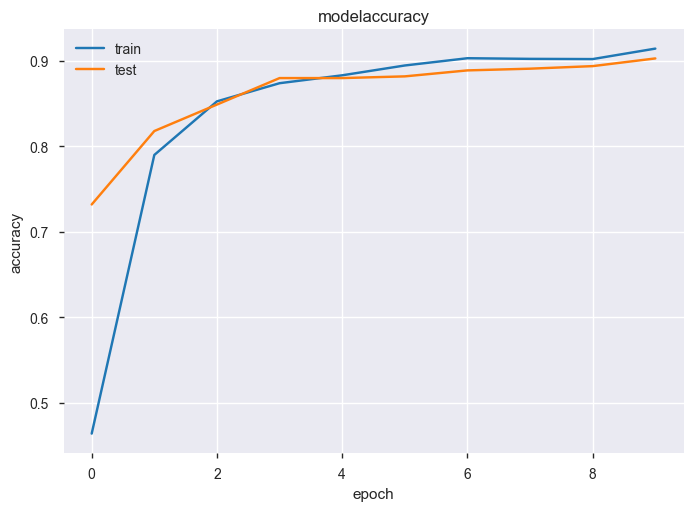

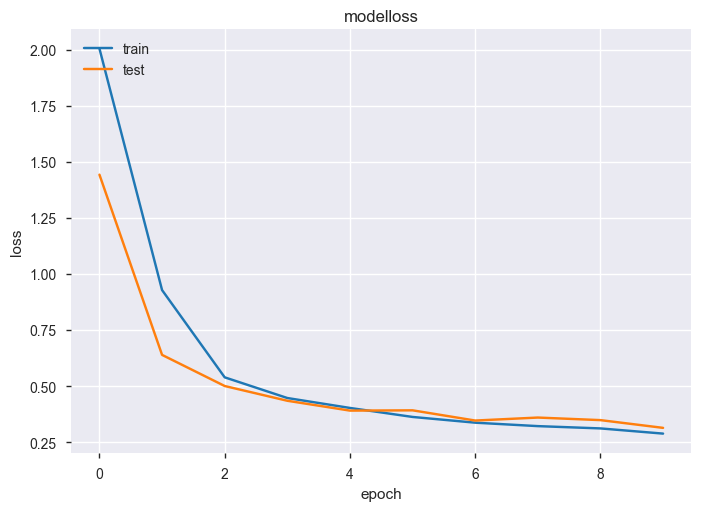

In [7]:
model = build_model(num_classes)
fit = model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_valid, y_valid))

loss, acc = model.evaluate(x_valid, y_valid, verbose=0)
y_pred = model.predict_classes(x_valid, batch_size=32, verbose=1)
y_pred = np_utils.to_categorical(y_pred, 10)

print('Test loss: %s, Test acc: %s' % (loss, acc))
print(classification_report(y_valid, y_pred))
plot_learning(fit.history['acc'], fit.history['val_acc'], 'accuracy')
plot_learning(fit.history['loss'], fit.history['val_loss'], 'loss')

In [21]:
test_pred = model.predict_classes(x_test, batch_size=32, verbose=1)
test_pred = pd.DataFrame(test_pred, columns=['Label'])
test_pred.index = test_pred.index + 1
print(test_pred.head())

   32/28000 [..............................] - ETA: 8s

  192/28000 [..............................] - ETA: 9s

  320/28000 [..............................] - ETA: 10s

  512/28000 [..............................] - ETA: 9s 

  736/28000 [..............................] - ETA: 8s

  992/28000 [>.............................] - ETA: 7s

 1184/28000 [>.............................] - ETA: 7s

 1408/28000 [>.............................] - ETA: 7s

 1632/28000 [>.............................] - ETA: 6s

 1856/28000 [>.............................] - ETA: 6s

 2080/28000 [=>............................] - ETA: 6s

 2304/28000 [=>............................] - ETA: 6s

 2496/28000 [=>............................] - ETA: 6s

 2720/28000 [=>............................] - ETA: 6s

 2880/28000 [==>...........................] - ETA: 6s

 3008/28000 [==>...........................] - ETA: 6s

 3104/28000 [==>...........................] - ETA: 6s

 3232/28000 [==>...........................] - ETA: 7s

 3296/28000 [==>...........................] - ETA: 7s

 3456/28000 [==>...........................] - ETA: 7s

 3616/28000 [==>...........................] - ETA: 7s

 3744/28000 [===>..........................] - ETA: 7s

 3936/28000 [===>..........................] - ETA: 7s

 4128/28000 [===>..........................] - ETA: 7s

 4384/28000 [===>..........................] - ETA: 7s

 4640/28000 [===>..........................] - ETA: 6s

 4864/28000 [====>.........................] - ETA: 6s

 5088/28000 [====>.........................] - ETA: 6s

 5312/28000 [====>.........................] - ETA: 6s

 5568/28000 [====>.........................] - ETA: 6s

 5824/28000 [=====>........................] - ETA: 6s

 6080/28000 [=====>........................] - ETA: 6s

 6336/28000 [=====>........................] - ETA: 5s

 6560/28000 [======>.......................] - ETA: 5s

 6752/28000 [======>.......................] - ETA: 5s

 6912/28000 [======>.......................] - ETA: 5s

 7168/28000 [======>.......................] - ETA: 5s

 7456/28000 [======>.......................] - ETA: 5s

 7712/28000 [=======>......................] - ETA: 5s

 7936/28000 [=======>......................] - ETA: 5s

 8160/28000 [=======>......................] - ETA: 5s

 8416/28000 [========>.....................] - ETA: 5s

 8672/28000 [========>.....................] - ETA: 5s

 8896/28000 [========>.....................] - ETA: 4s

 9152/28000 [========>.....................] - ETA: 4s

 9440/28000 [=========>....................] - ETA: 4s

 9664/28000 [=========>....................] - ETA: 4s

 9888/28000 [=========>....................] - ETA: 4s

10112/28000 [=========>....................] - ETA: 4s

10336/28000 [==========>...................] - ETA: 4s

10592/28000 [==========>...................] - ETA: 4s

10848/28000 [==========>...................] - ETA: 4s

11072/28000 [==========>...................] - ETA: 4s

11232/28000 [===========>..................] - ETA: 4s

11456/28000 [===========>..................] - ETA: 4s

11680/28000 [===========>..................] - ETA: 4s

11936/28000 [===========>..................] - ETA: 4s

12192/28000 [============>.................] - ETA: 3s

12416/28000 [============>.................] - ETA: 3s

12640/28000 [============>.................] - ETA: 3s

12864/28000 [============>.................] - ETA: 3s

13088/28000 [=============>................] - ETA: 3s

13344/28000 [=============>................] - ETA: 3s

13632/28000 [=============>................] - ETA: 3s

13920/28000 [=============>................] - ETA: 3s

14144/28000 [==============>...............] - ETA: 3s

14368/28000 [==============>...............] - ETA: 3s

14592/28000 [==============>...............] - ETA: 3s

14816/28000 [==============>...............] - ETA: 3s

15072/28000 [===============>..............] - ETA: 3s

15360/28000 [===============>..............] - ETA: 3s

15584/28000 [===============>..............] - ETA: 3s

15840/28000 [===============>..............] - ETA: 2s

16064/28000 [================>.............] - ETA: 2s

16288/28000 [================>.............] - ETA: 2s

16544/28000 [================>.............] - ETA: 2s

16832/28000 [=================>............] - ETA: 2s

17120/28000 [=================>............] - ETA: 2s

17408/28000 [=================>............] - ETA: 2s

17696/28000 [=================>............] - ETA: 2s

17984/28000 [==================>...........] - ETA: 2s

18272/28000 [==================>...........] - ETA: 2s

18560/28000 [==================>...........] - ETA: 2s

18848/28000 [===================>..........] - ETA: 2s

19136/28000 [===================>..........] - ETA: 2s

19424/28000 [===================>..........] - ETA: 2s

19712/28000 [====================>.........] - ETA: 1s

20000/28000 [====================>.........] - ETA: 1s

20288/28000 [====================>.........] - ETA: 1s

20576/28000 [=====================>........] - ETA: 1s

20864/28000 [=====================>........] - ETA: 1s

21152/28000 [=====================>........] - ETA: 1s

21408/28000 [=====================>........] - ETA: 1s

21664/28000 [======================>.......] - ETA: 1s

21952/28000 [======================>.......] - ETA: 1s

22240/28000 [======================>.......] - ETA: 1s

22528/28000 [=======================>......] - ETA: 1s

22816/28000 [=======================>......] - ETA: 1s

23104/28000 [=======================>......] - ETA: 1s

23392/28000 [========================>.....] - ETA: 1s

23680/28000 [========================>.....] - ETA: 0s

23968/28000 [========================>.....] - ETA: 0s



24256/28000 [========================>.....] - ETA: 0s

24512/28000 [=========================>....] - ETA: 0s

24800/28000 [=========================>....] - ETA: 0s

25088/28000 [=========================>....] - ETA: 0s

25376/28000 [==========================>...] - ETA: 0s

25664/28000 [==========================>...] - ETA: 0s

25952/28000 [==========================>...] - ETA: 0s

26240/28000 [===========================>..] - ETA: 0s

26432/28000 [===========================>..] - ETA: 0s

26720/28000 [===========================>..] - ETA: 0s

27008/28000 [===========================>..] - ETA: 0s

27296/28000 [============================>.] - ETA: 0s

27584/28000 [============================>.] - ETA: 0s

27872/28000 [============================>.] - ETA: 0s

28000/28000 [==============================] - 6s 219us/step


   Label
1      2
2      0
3      9
4      9
5      3


In [22]:

test_pred.to_csv('submit.csv', index_label='ImageId')